# TP2: Linear Regression

In [49]:
# Change here using YOUR own first and last names
fn1 = "mehdi"
ln1 = "bentaleb"
filename = "_".join(map(lambda s: s.strip().lower(),
                        ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.simplefilter("ignore")

## Question 1: Preprocessing

- Load the data

In [51]:
path = "./"
file = "data_dm3.csv"
data = pd.read_csv(path+file, low_memory=False)
# Renaming the columns of the dataset
data.columns = ['C'+str(i) for i in range(211)]
n_lines = data.shape[0]
n = data.shape[1]  # Number of columns
data

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C201,C202,C203,C204,C205,C206,C207,C208,C209,C210
0,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
1,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
2,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
3,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0
4,1.513286,0.072830,1.243039,-0.368609,-0.564998,-1.736720,-0.441544,-1.395122,-1.550146,0.941235,...,0.767162,0.417754,-1.010548,1.397951,0.074975,1.381528,-1.367316,1.200057,-0.292088,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,-0.270323,-0.437638,0.347423,-0.123436,0.344168,-0.777434,-1.380455,0.491346,0.713854,-0.693186,...,-0.051364,-0.371945,-0.114830,0.153832,-0.973347,-0.997793,0.158006,-0.139519,1.010518,178.0
437,0.872196,0.975497,0.819331,-0.975557,-0.968388,1.029983,-0.079420,-0.130714,0.201144,-2.390860,...,-0.327924,0.350886,-0.305686,-1.292688,0.124676,1.465920,0.663206,1.278693,0.419890,104.0
438,-0.032586,-0.571893,0.806842,0.562865,1.194239,-0.345469,0.717316,0.234458,1.546961,0.554013,...,-1.467585,0.584516,-0.281854,-0.618165,0.840381,1.261452,-0.084541,0.301755,0.517624,132.0
439,-1.529754,0.756967,2.251588,-0.052600,0.502047,0.046229,-1.571494,0.238793,-1.211869,-0.896148,...,-0.000023,-2.231379,-0.880398,0.267481,1.036171,-0.962587,0.491072,-1.389069,0.473725,220.0


- Plot the mean and the standard deviation.

Text(0.5, 1.0, 'mean, median and standard deviation for each covariate')

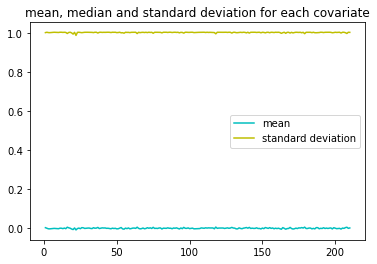

In [52]:
L_mean = data.mean(axis=0)[:-1]
L_std = data.std(axis=0)[:-1]
x = np.linspace(1, 210, 210)
plt.plot(x, L_mean, 'c')
plt.plot(x, L_std, 'y')
plt.legend(["mean", "standard deviation"])
plt.title("mean, median and standard deviation for each covariate")

The data is  centered as the mean is always equal to 0. It is also standardized since that we have that the standard deviation is equal to 1 (and the mean equal to 0). However it is not normalized as some values are greater than 1, for example data[2][439]=2,25 

- Separate the data frame in two matrices, X and Y, containing the input and output data respectively. 

In [53]:
np.random.seed(0)  # Setting the random seed to 0
X = data.iloc[:, :n-1]
Y = data.iloc[:, n-1]

- Separate the covariate data in train and test sets. Save one fourth of the data as testing. 

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

- Center and standardize the train and test data and plot its mean and variance again.

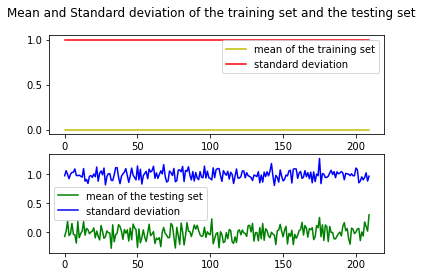

In [55]:
# We scale the training and the testing data set

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# We calculate the mean of the training and the testing data set

X_train_mean = X_train_scaled.mean(axis=0)
X_test_mean = X_test_scaled.mean(axis=0)

# We calculate the standard deviation of the training and the testing data set

X_train_std = X_train_scaled.std(axis=0)
X_test_std = X_test_scaled.std(axis=0)

fig, axs = plt.subplots(2)

fig.suptitle(
    'Mean and Standard deviation of the training set and the testing set')

axs[0].plot(X_train_mean, 'y')
axs[0].plot(X_train_std, 'r')
axs[0].legend(["mean of the training set", "standard deviation"])

axs[1].plot(X_test_mean, 'g')
axs[1].plot(X_test_std, 'b')
axs[1].legend(["mean of the testing set", "standard deviation"])

- Create two empty dataFrames

In [56]:
df_test = pd.DataFrame()
df_coef = pd.DataFrame()

## Question 2 :

- Compute the determination coefficient and the mean squared error

In [57]:
def determinationcoeff(y_hat, y):
    ymean = y.mean()
    res = 1-(np.sum((y_hat-y)**2)/np.sum((y-ymean)**2))
    return res


def MSE(y_hat, y):
    n = len(y)
    return sum((y_hat-y)**2)/n

## Question 3 :

- Apply the linear regression of the sklearn library to the train data

In [58]:
res = LR().fit(X_train, y_train)
y_hat = res.predict(X_test)

- Print the determination coefficient and the MSE of the test data

In [59]:
print("The Determination coefficient is:", determinationcoeff(y_hat, y_test))
print("The MSE is", MSE(y_hat, y_test))

The Determination coefficient is: 0.37928960352509755
The MSE is 3678.0441648427936


- Add a column named OLS to the df_test dataframe that contains the predicted values for the sample

In [60]:
df_test["OLS"] = y_hat.tolist()
df_test

,OLS
0,310.45483
1,272.95483
2,145.07983
3,210.39233
4,123.95483
...,...
106,135.45483
107,235.82983
108,276.45483
109,123.45483


- Add a column named OLS to the df_coef dataframe that contains the estimated coefficients

In [61]:
df_coef["OLS"] = res.coef_.tolist()
df_coef

,OLS
0,5.296429e+15
1,-2.217933e+15
2,-1.605339e+15
3,4.680493e+15
4,1.322380e+14
...,...
205,5.530037e+14
206,1.172488e+15
207,1.365079e+15
208,1.650656e+15


# PCA

## Question 4 :

- Plot a heatmap of the covariance matrix

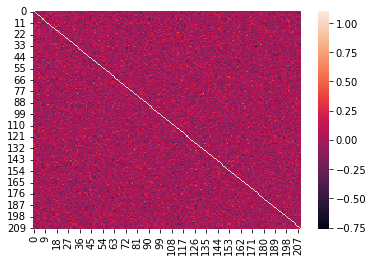

In [62]:
covar_matrix = np.cov(X_train.T)
h_map = sns.heatmap(covar_matrix)

Compute the singular value decomposition of the covariance matrix. For consistency in the notation use U,s,V = SVD(M).

In [63]:
U, s, V = np.linalg.svd(covar_matrix)

## Question 5 : 

- Show that $ \lambda_i = \dfrac{\sigma_{i}^2}{n-1} $

We use the SVD on $ X \in \mathbb{R}^{n \times   p}$.

$ X = U \Sigma V^\top $ 

Let's denote $ m=\dfrac{1}{n-1}$
So we have : 

$ m  X X^\top = m U \Sigma V^\top (U \Sigma V^\top)^\top $

$ = m U \Sigma V^\top V \Sigma^\top U^\top $  

$ = m U \Sigma \Sigma^\top U^\top    $ (because $V^\top V = I_{p}$) 

$ = m U S U^\top    $ 

with $  
  S =
  \begin{bmatrix}
    \sigma_{1}^2 & & \\
    & \ddots & \\
    & & \sigma_{r}^2
  \end{bmatrix}
 $
 
 Using that U is an orthonormal matrix, we can conclude that $ \lambda_i = \dfrac{\sigma_{i}^2}{n-1} $.



## Question 6 : 

- We transform the data to a new coordinate system

In [64]:
PC = X_train.to_numpy()@U
PC1 = PC[:, 0]
PC2 = PC[:, 1]
print("The variance explained by the first component is", s[0]/s.sum())
print("The variance explained by the the second component is", s[1]/s.sum())

The variance explained by the first component is 0.026858064748729427
The variance explained by the the second component is 0.025825351145798894


- Plot the projection of the data into the 1st and 2nd components

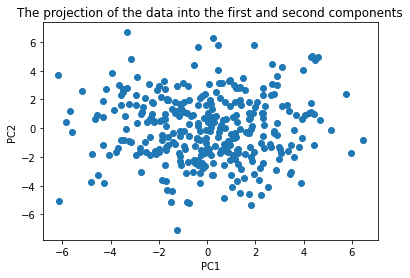

In [65]:
plt.title("The projection of the data into the first and second components")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(PC1, PC2)

## Question 7 : 

- Explain what the loadings are in terms of the variance and plot them for the 1st and 2nd directions.

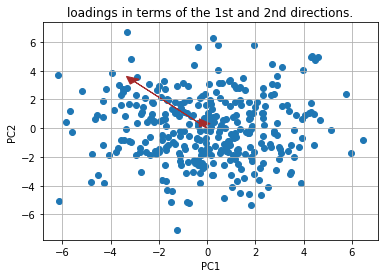

In [66]:
# Computing the  loadings
loadings = np.dot(U, np.diag(np.sqrt(s)))

# drawing the loading of the variables


def loading_plot(coeff):
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0]*np.sqrt(n_lines), coeff[i, 1] *
                  np.sqrt(n_lines), head_width=0.5, head_length=0.5, color='brown')

    plt.scatter(PC1, PC2)
    plt.title("loadings in terms of the 1st and 2nd directions.")
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()


loading_plot(loadings[:2])

## Question 8 : 


- Compute projected data for both the train and the test data.

In [67]:
# Projected data for the train set
Xp_train = X_train @ U[:, :60]
# Projected data for the test set
Xp_test = X_test @ U[:, :60]

- Apply the linear regression of the sklearn library to the low dimensional data.

In [68]:
model = LR().fit(Xp_train, y_train)

- Print the determination coefficient and the MSE of the test data.

In [69]:
# Let's compute the predicted values first
y_pred = model.predict(Xp_test)
# Determination Coefficient
det_coef = determinationcoeff(y_pred, y_test)
print(det_coef)
print("The Determination Coefficient is :", det_coef)
# Mean Squared error
m_s_e = MSE(y_pred, y_test)
print("The Mean Squared Error is :", m_s_e)

0.4143235327019682
The Determination Coefficient is : 0.4143235327019682
The Mean Squared Error is : 3470.449222801709


- Add a column named **pca_ols** to the **df_test** dataframe that contains the predicted values for the test sample.

In [70]:
df_test['pca_ols'] = y_pred
df_test

,OLS,pca_ols
0,310.45483,248.676364
1,272.95483,258.644361
2,145.07983,141.695931
3,210.39233,189.704242
4,123.95483,147.716639
...,...,...
106,135.45483,116.831900
107,235.82983,230.139761
108,276.45483,232.439934
109,123.45483,108.278672


## Question 9 : 




- Apply the **LassoCV** of the sklearn library: it uses cross-validation internally for different  values of the regularization parameter alpha: try 30 different values for alpha, spaced evenly on a log scale beteween 10e.3 and 10e1 (see function np.logspace).

In [71]:
alphas = np.logspace(10**(-3), 10, 100)
lasso_model = LassoCV(alphas=alphas)
lasso_model.fit(X_train, y_train)

LassoCV(alphas=array([1.00230524e+00, 1.26473635e+00, 1.59587915e+00, 2.01372425e+00,
       2.54097271e+00, 3.20626932e+00, 4.04575892e+00, 5.10505000e+00,
       6.44169266e+00, 8.12830516e+00, 1.02565193e+01, 1.29419584e+01,
       1.63305195e+01, 2.06062991e+01, 2.60015956e+01, 3.28095293e+01,
       4.13999675e+01, 5.22396189e+01, 6.59173895e+01, 8.31763771e+01,
       1.04954243e+02, 1.32434154e+0...
       4.75335226e+07, 5.99791076e+07, 7.56832895e+07, 9.54992586e+07,
       1.20503594e+08, 1.52054753e+08, 1.91866874e+08, 2.42102905e+08,
       3.05492111e+08, 3.85478358e+08, 4.86407206e+08, 6.13762005e+08,
       7.74461798e+08, 9.77237221e+08, 1.23310483e+09, 1.55596563e+09,
       1.96336028e+09, 2.47742206e+09, 3.12607937e+09, 3.94457302e+09,
       4.97737085e+09, 6.28058359e+09, 7.92501330e+09, 1.00000000e+10]))

Print the determination coefficient and the MSE of the test data.

In [72]:
# Let's compute the predicted values first
y_pred = lasso_model.predict(X_test)
# Determination Coefficient
det_coef = determinationcoeff(y_pred, y_test)
print("The Determination Coefficient of the test set is :", det_coef)
# Mean Squared error
m_s_e = MSE(y_pred, y_test)
print("The Mean Squared Error of the test set is :", m_s_e)

The Determination Coefficient of the test set is : 0.5122745059179211
The Mean Squared Error of the test set is : 2890.0368315744663


- Print the regularization parameter that the algorithm selects.

In [73]:
print("The regularization parameter that the algorithm selects is :", lasso_model.alpha_)

The regularization parameter that the algorithm selects is : 8.128305161640993


- Add a column named **lasso** to the **df_test** dataframe that contains the predicted values for the sample

In [74]:
df_test["Lasso"] = y_pred
df_test

,OLS,pca_ols,Lasso
0,310.45483,248.676364,221.828156
1,272.95483,258.644361,229.181361
2,145.07983,141.695931,140.944623
3,210.39233,189.704242,120.652389
4,123.95483,147.716639,173.209546
...,...,...,...
106,135.45483,116.831900,159.875593
107,235.82983,230.139761,251.057408
108,276.45483,232.439934,249.683783
109,123.45483,108.278672,110.496599


- Add a column named **lasso** to the **df_coef** dataframe that contains the estimated coefficients.

In [75]:
df_coef["Lasso"] = lasso_model.coef_
df_coef

,OLS,Lasso
0,5.296429e+15,0.0
1,-2.217933e+15,-0.0
2,-1.605339e+15,0.0
3,4.680493e+15,0.0
4,1.322380e+14,-0.0
...,...,...
205,5.530037e+14,-0.0
206,1.172488e+15,-0.0
207,1.365079e+15,0.0
208,1.650656e+15,0.0


## Question 10 : 



- Apply the **RidgeCV** of the sklearn library: it uses crossvalidation internally for different values of the regularization parameter alpha: try 30 different values for alpha, spaced evenly on a log scale beteween 10e-1 and 10e2 (see function np.logspace).

In [76]:
alphas = np.logspace(0.1, 100, 100)
ridge_model = RidgeCV(alphas=alphas)
ridge_model.fit(X_train, y_train)

RidgeCV(alphas=array([1.25892541e+000, 1.28555573e+001, 1.31274937e+002, 1.34051824e+003,
       1.36887451e+004, 1.39783061e+005, 1.42739922e+006, 1.45759330e+007,
       1.48842609e+008, 1.51991108e+009, 1.55206209e+010, 1.58489319e+011,
       1.61841878e+012, 1.65265354e+013, 1.68761248e+014, 1.72331091e+015,
       1.75976447e+016, 1.79698915e+017, 1.83500125e+018, 1.87381742e+019,
       1.913454...
       6.17887047e+076, 6.30957344e+077, 6.44304121e+078, 6.57933225e+079,
       6.71850628e+080, 6.86062429e+081, 7.00574855e+082, 7.15394265e+083,
       7.30527154e+084, 7.45980152e+085, 7.61760031e+086, 7.77873705e+087,
       7.94328235e+088, 8.11130831e+089, 8.28288856e+090, 8.45809828e+091,
       8.63701425e+092, 8.81971488e+093, 9.00628020e+094, 9.19679199e+095,
       9.39133370e+096, 9.58999061e+097, 9.79284974e+098, 1.00000000e+100]))

- Print the determination coefficient and the MSE of the test data.

In [77]:
# Let's compute the predicted values first
y_pred = ridge_model.predict(X_test)
# Determination Coefficient
det_coef = determinationcoeff(y_pred, y_test)
print("The Determination Coefficient of the test set is :", det_coef)
# Mean Squared error
m_s_e = MSE(y_test, y_pred)
print("The Mean Squared Error of the test set is :", m_s_e)

The Determination Coefficient of the test set is : 0.4276860915013707
The Mean Squared Error of the test set is : 3391.2688486713128


- Print the regulatization parameter that the algorithm selects.

In [78]:
print("The regularization parameter that the algorithm selects is :", ridge_model.alpha_)

The regularization parameter that the algorithm selects is : 131.2749368925199


- Add a column named **Ridge** to the **df_test** dataframe that contains the predicted values for the sample.

In [79]:
df_test["Ridge"] = y_pred
df_test

,OLS,pca_ols,Lasso,Ridge
0,310.45483,248.676364,221.828156,233.251211
1,272.95483,258.644361,229.181361,234.892850
2,145.07983,141.695931,140.944623,133.819090
3,210.39233,189.704242,120.652389,188.120912
4,123.95483,147.716639,173.209546,142.005443
...,...,...,...,...
106,135.45483,116.831900,159.875593,117.581917
107,235.82983,230.139761,251.057408,220.506272
108,276.45483,232.439934,249.683783,246.646193
109,123.45483,108.278672,110.496599,116.398520


- Add a column named **Ridge** to the **df_coef** dataframe that contains the estimated coefficients.

In [80]:
df_coef["Ridge"] = ridge_model.coef_
df_coef

,OLS,Lasso,Ridge
0,5.296429e+15,0.0,0.284079
1,-2.217933e+15,-0.0,-0.462503
2,-1.605339e+15,0.0,0.805714
3,4.680493e+15,0.0,0.227146
4,1.322380e+14,-0.0,-0.368215
...,...,...,...
205,5.530037e+14,-0.0,-0.555775
206,1.172488e+15,-0.0,-0.915372
207,1.365079e+15,0.0,0.019872
208,1.650656e+15,0.0,1.468436


# Variable Selection


## Question 11 : 

- Program the method of the forward variable selection

In [81]:
def forward_variable_selection_without_stop(data, target):
    initial_features = data.columns.tolist()
    best_features = []
    best_pvalues = []
    number = len(initial_features)  # number of features
    while (number > 0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype='float64')
        for new_column in remaining_features:
            model = sm.OLS(target.values.reshape(-1, 1),
                           sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_features.append(new_pval.idxmin())
        best_pvalues.append(new_pval.min())
        number -= 1

    return best_features, best_pvalues

In [82]:
fvs_without_stop = forward_variable_selection_without_stop(X_train, y_train)

In [83]:
print(fvs_without_stop[0])

['C58', 'C123', 'C167', 'C174', 'C135', 'C130', 'C159', 'C114', 'C31', 'C146', 'C40', 'C14', 'C166', 'C48', 'C44', 'C131', 'C157', 'C118', 'C133', 'C34', 'C112', 'C79', 'C149', 'C50', 'C23', 'C104', 'C190', 'C99', 'C111', 'C4', 'C93', 'C63', 'C33', 'C181', 'C17', 'C158', 'C132', 'C191', 'C139', 'C178', 'C21', 'C208', 'C25', 'C39', 'C98', 'C120', 'C138', 'C115', 'C204', 'C15', 'C150', 'C170', 'C0', 'C145', 'C6', 'C162', 'C171', 'C116', 'C201', 'C194', 'C89', 'C80', 'C2', 'C12', 'C101', 'C189', 'C60', 'C153', 'C154', 'C172', 'C81', 'C206', 'C173', 'C200', 'C209', 'C184', 'C106', 'C129', 'C62', 'C54', 'C102', 'C43', 'C165', 'C103', 'C122', 'C7', 'C65', 'C84', 'C117', 'C126', 'C92', 'C28', 'C202', 'C86', 'C35', 'C57', 'C185', 'C95', 'C161', 'C26', 'C151', 'C5', 'C52', 'C124', 'C144', 'C168', 'C13', 'C141', 'C36', 'C69', 'C53', 'C47', 'C8', 'C30', 'C96', 'C19', 'C90', 'C20', 'C75', 'C85', 'C74', 'C136', 'C49', 'C45', 'C94', 'C113', 'C91', 'C175', 'C24', 'C147', 'C11', 'C77', 'C70', 'C67', '

## Question 12 : 



- Stop criterion: We choose to stop if the p-value is larger than 0.05

In [84]:
def forward_variable_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    best_pvalues = []
    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype='float64')
        for new_column in remaining_features:
            model = sm.OLS(target.values.reshape(-1, 1),
                           sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value < significance_level):
            best_features.append(new_pval.idxmin())
            best_pvalues.append(new_pval.min())
        else:
            break
    return best_features, best_pvalues

In [85]:
fvs = forward_variable_selection(X_train, y_train)

In [86]:
print(fvs[0])

['C58', 'C123', 'C167', 'C174', 'C135', 'C130', 'C159', 'C114']


- Illustrate the method providing the 3 graphs of the test statistics obtained when selecting the 1st, 2nd and 3rd variables

$ \text{We know that }p_{value } = 2(1-\phi(\hat{T})) \\
\text{So, we get the Test Statistic :  }
\hat{T} = \phi^{-1}(1-p_{value}/2) $

In [87]:
phi_1 = stats.norm.cdf
test_statistic_values = phi_1(1 - np.array(fvs[1])/2)
test_statistic_values

array([0.84134475, 0.84134475, 0.84132444, 0.84086803, 0.84125654,
       0.84019609, 0.83909321, 0.8393391 ])

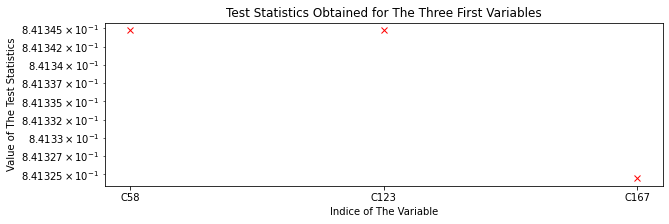

In [88]:
plt.figure(figsize=(10, 3))
plt.plot(fvs[0][:3], test_statistic_values[:3], "x", color='r')
plt.title('Test Statistics Obtained for The Three First Variables')
plt.xlabel('Indice of The Variable')
plt.ylabel('Value of The Test Statistics')
plt.yscale('log')
plt.show()

- Illustrate the method providing the graphs of the first 50 p-values, and trace the horizontal line with the ordinate 0.05 on the same plot.

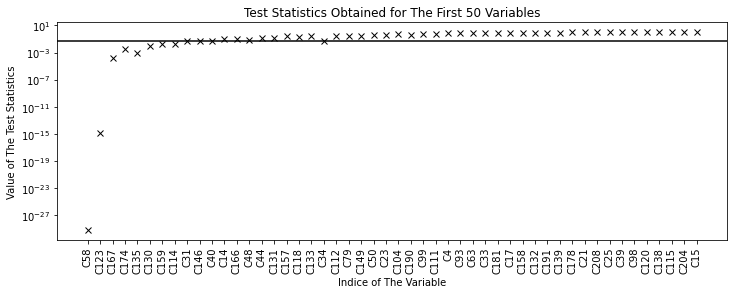

In [89]:
plt.figure(figsize=(12, 4))
plt.plot(fvs_without_stop[0][:50],
         fvs_without_stop[1][:50], "x", color='black')
plt.title('Test Statistics Obtained for The First 50 Variables')
plt.xlabel('Indice of The Variable')
plt.ylabel('Value of The Test Statistics')
plt.axhline(0.05, color='black')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

## Question 13 : 



- apply the OLS of the sklearn library.

In [90]:
X_train2 = X_train[fvs[0]]
res = LR().fit(X_train2, y_train)
X_test2 = X_test[fvs[0]]
X_train2

,C58,C123,C167,C174,C135,C130,C159,C114
20,-0.470368,-1.516414,0.025547,0.325982,1.065488,0.248592,0.501114,-0.764482
353,0.957193,1.559809,0.459840,0.016374,1.065488,0.082595,-1.648328,0.365561
281,-0.107813,-0.188037,-0.119218,0.248580,-0.938537,-0.527549,1.326951,2.014106
14,-0.379729,0.758030,1.690338,-0.835049,1.065488,-0.804965,1.438628,0.964514
300,-0.515688,-0.449776,1.111280,0.635590,1.065488,-0.560775,1.557811,-1.161755
...,...,...,...,...,...,...,...,...
323,0.118784,1.388584,0.242693,-0.912451,-0.938537,-0.041825,0.368658,0.331479
192,-0.107813,0.831278,-1.349715,-0.835049,1.065488,0.746908,0.421352,0.388430
117,-0.221112,0.433349,0.532222,-0.835049,1.065488,-1.705046,0.334971,-1.034980
47,-0.878243,-1.250342,0.242693,0.867796,1.065488,0.731551,-0.774123,-0.634020


- print the determination coefficient and the MSE of the test data



In [91]:
# Let's compute the predicted values first
y_pred = res.predict(X_test2)
# Determination Coefficient
det_coef = determinationcoeff(y_pred, y_test)
print("The Determination Coefficient is :", det_coef)
# Mean Squared error
m_s_e = MSE(y_test, y_pred)
print("The Mean Squared Error is :", m_s_e)

The Determination Coefficient is : 0.4844484934740212
The Mean Squared Error is : 3054.9209760665867


- add a column named FVS to the df_test dataframe that contains the predicted values for the sample and



In [92]:
df_test["FVS"] = y_pred
df_test

,OLS,pca_ols,Lasso,Ridge,FVS
0,310.45483,248.676364,221.828156,233.251211,242.875491
1,272.95483,258.644361,229.181361,234.892850,258.020883
2,145.07983,141.695931,140.944623,133.819090,137.224789
3,210.39233,189.704242,120.652389,188.120912,161.076688
4,123.95483,147.716639,173.209546,142.005443,192.009472
...,...,...,...,...,...
106,135.45483,116.831900,159.875593,117.581917,132.402747
107,235.82983,230.139761,251.057408,220.506272,226.217477
108,276.45483,232.439934,249.683783,246.646193,255.261395
109,123.45483,108.278672,110.496599,116.398520,130.977888


- add a column named FVS to the df_coef dataframe that contains the estimated coefficients

In [110]:
df_coef["FVS"] = np.append(res.coef_, [0 for i in range(210-len(res.coef_))])
l = np.zeros(210)
fvs_int = [int(i[1:]) for i in fvs[0]]
for i in range(len(res.coef_)):
    l[fvs_int[i]] = res.coef_[i]
df_coef["FVS"] = l
# print(l[58]) to Verify
df_coef

,OLS,Lasso,Ridge,FVS
0,5.296429e+15,0.0,0.284079,0.0
1,-2.217933e+15,-0.0,-0.462503,0.0
2,-1.605339e+15,0.0,0.805714,0.0
3,4.680493e+15,0.0,0.227146,0.0
4,1.322380e+14,-0.0,-0.368215,0.0
...,...,...,...,...
205,5.530037e+14,-0.0,-0.555775,0.0
206,1.172488e+15,-0.0,-0.915372,0.0
207,1.365079e+15,0.0,0.019872,0.0
208,1.650656e+15,0.0,1.468436,0.0


# Comparison

## Question 14 : 



- Compare the values of the coefficients from the different methods by plotting df_coef.

<AxesSubplot:>

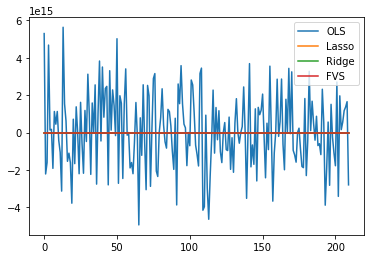

In [94]:
df_coef.plot()

We remark that OLS coefficients are much higher than the coefficients of the other methods. So, we can't see on the graph the distinction between the three methods FVS, Lasso and Ridge.

## Question 15 : 


- How many coefficients are set exactly to zero by each of the methods considered in the data frame df_coef? (That is: OLS, Lasso, Ridge and FVS but not PCA before OLS). Why is the number of coefficients set to 0 so different for Lasso and Ridge?

In [95]:
(df_coef == 0).sum()

OLS        0
Lasso    205
Ridge      0
FVS      202
dtype: int64

It is known that the Ridge shrinks the variables by pushing their coefficients to 0 but Lasso makes them equal to 0.

## Question 16 : 

- Give a pairplot of the df_test dataframe. Let the fitted coefficient of the previous problems be θˆrd for the ridge, θˆols for the OLS, θˆpca for the PCA before OLS, θˆls for the lasso. Specify the equation to predict the value of a new, unseen data point x.

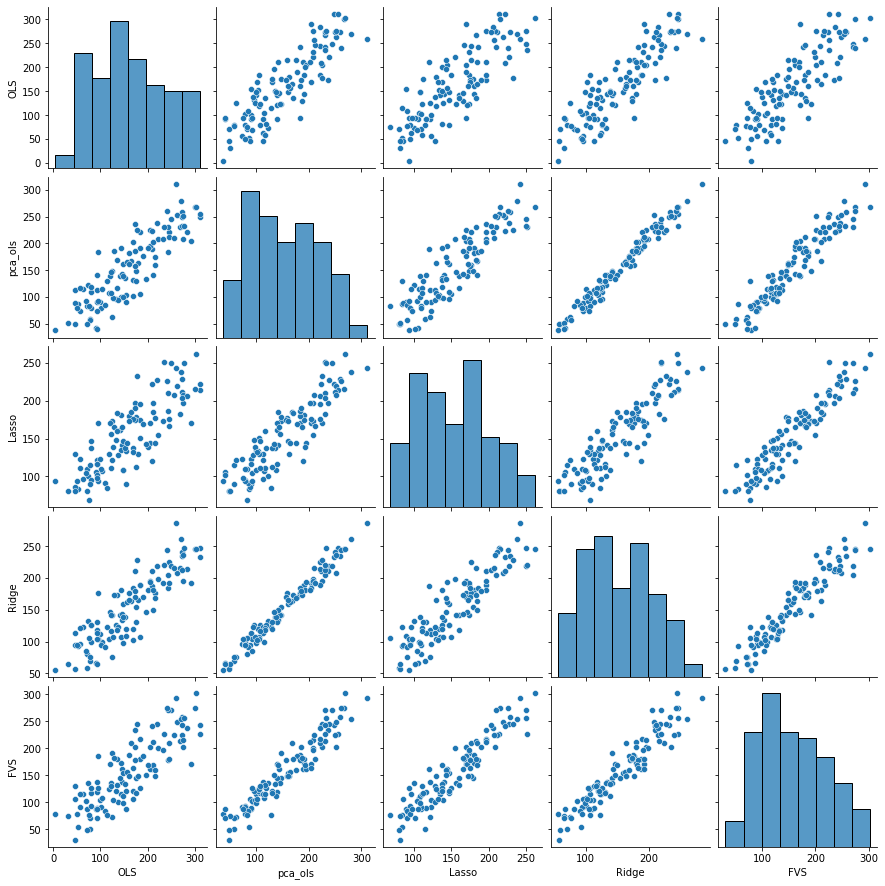

In [96]:
sns.pairplot(df_test)

The equation to predict the value of a new, unseen data point x is : 
$$
y = x^{T}\theta
$$

